In [ ]:
from google.colab import files
upload = files.upload()

Saving Travel details dataset.csv to Travel details dataset.csv


In [ ]:
import pandas as pd
df=pd.read_csv('Travel details dataset.csv')
df.head()

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200


In [ ]:
import pandas as pd
import numpy as np
import os

# Step 1: Load the Dataset
file_path = 'Travel details dataset.csv'
df = pd.read_csv(file_path)

# Step 2: Handle Missing or Incomplete Data
df.replace('#####', np.nan, inplace=True)
df.dropna(subset=['Destination', 'Start date', 'End date'], inplace=True)

# Step 3: Correct Data Types
df['Start date'] = pd.to_datetime(df['Start date'], errors='coerce')
df['End date'] = pd.to_datetime(df['End date'], errors='coerce')
df['Traveler age'] = pd.to_numeric(df['Traveler age'], errors='coerce')
df['Accommodation cost'] = pd.to_numeric(df['Accommodation cost'], errors='coerce')
df['Transportation cost'] = pd.to_numeric(df['Transportation cost'], errors='coerce')

# Remove rows with invalid dates
df.dropna(subset=['Start date', 'End date'], inplace=True)

# Step 4: Handle Duplicates
df.drop_duplicates(inplace=True)

# Step 5: Standardize Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'\W', '')

# Step 6: Remove Outliers
numeric_columns = ['traveler_age', 'accommodation_cost', 'transportation_cost']
for col in numeric_columns:
    df = df[(df[col] > 0) & (df[col] < df[col].quantile(0.99))]

# Step 7: Validate Consistency
df = df[df['end_date'] > df['start_date']]

# Step 8: Save the Clean Dataset
clean_file_path = '/mnt/data/cleaned_travel_dataset 1.xlsx'  # Changed the extension to .xlsx
os.makedirs(os.path.dirname(clean_file_path), exist_ok=True)
df.to_excel(clean_file_path, index=False)

print(f"Clean dataset saved to {clean_file_path}")

# Display the first few rows of the cleaned DataFrame
df.head()  # Add this line to view the output

Clean dataset saved to /mnt/data/cleaned_travel_dataset 1.xlsx


,trip_id,destination,start_date,end_date,duration_(days),traveler_name,traveler_age,traveler_gender,traveler_nationality,accommodation_type,accommodation_cost,transportation_type,transportation_cost
0,1,"London, UK",2023-05-01,2023-05-08,7.0,John Smith,35.0,Male,American,Hotel,1200.0,Flight,600.0
1,2,"Phuket, Thailand",2023-06-15,2023-06-20,5.0,Jane Doe,28.0,Female,Canadian,Resort,800.0,Flight,500.0
2,3,"Bali, Indonesia",2023-07-01,2023-07-08,7.0,David Lee,45.0,Male,Korean,Villa,1000.0,Flight,700.0
3,4,"New York, USA",2023-08-15,2023-08-29,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000.0,Flight,1000.0
4,5,"Tokyo, Japan",2023-09-10,2023-09-17,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700.0,Train,200.0


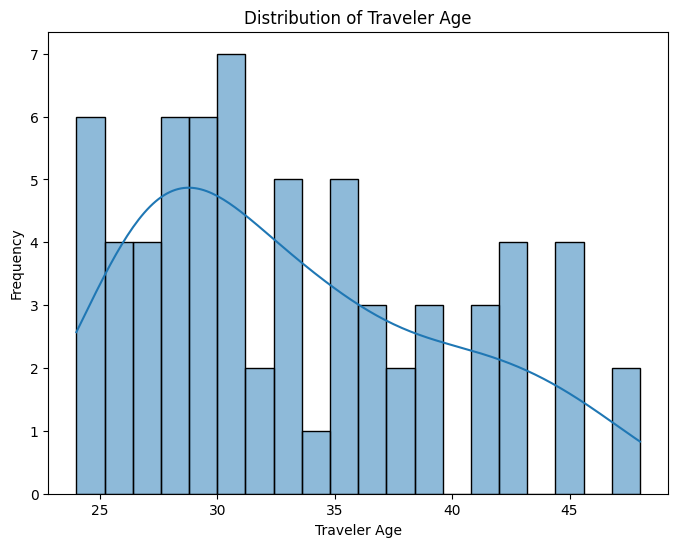

In [ ]:
# Distribution of Traveler Age
plt.figure(figsize=(8, 6))
sns.histplot(df['traveler_age'], bins=20, kde=True)
plt.title('Distribution of Traveler Age')
plt.xlabel('Traveler Age')
plt.ylabel('Frequency')
plt.show()

# Similar histograms for 'accommodation_cost' and 'transportation_cost'

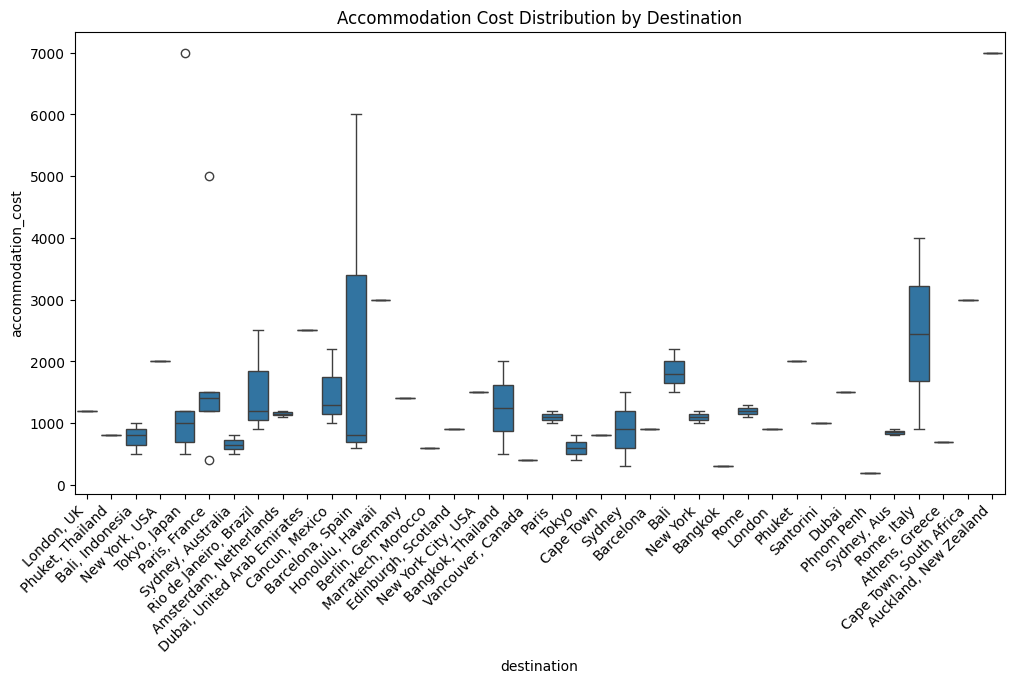

In [ ]:
# Accommodation cost distribution by Destination
plt.figure(figsize=(12, 6))
sns.boxplot(x='destination', y='accommodation_cost', data=df)
plt.title('Accommodation Cost Distribution by Destination')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

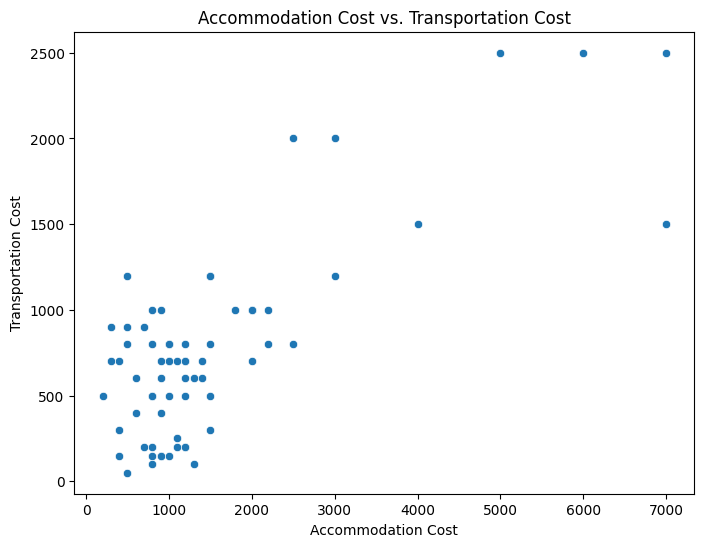

In [ ]:
# Relationship between Accommodation Cost and Transportation Cost
plt.figure(figsize=(8, 6))
sns.scatterplot(x='accommodation_cost', y='transportation_cost', data=df)
plt.title('Accommodation Cost vs. Transportation Cost')
plt.xlabel('Accommodation Cost')
plt.ylabel('Transportation Cost')
plt.show()

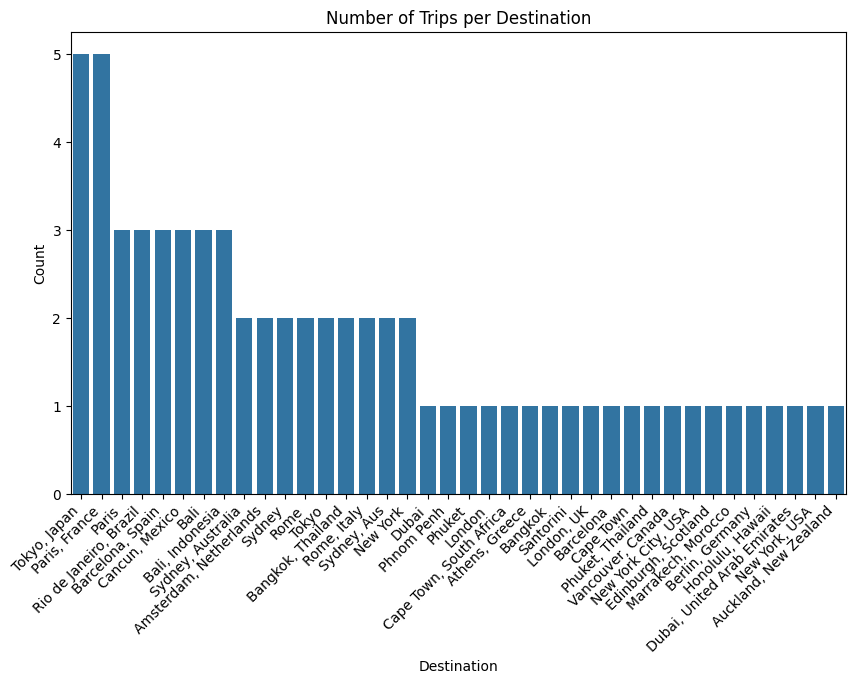

In [ ]:
# Number of trips per Destination
plt.figure(figsize=(10, 6))
destination_counts = df['destination'].value_counts()
sns.barplot(x=destination_counts.index, y=destination_counts.values)
plt.title('Number of Trips per Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

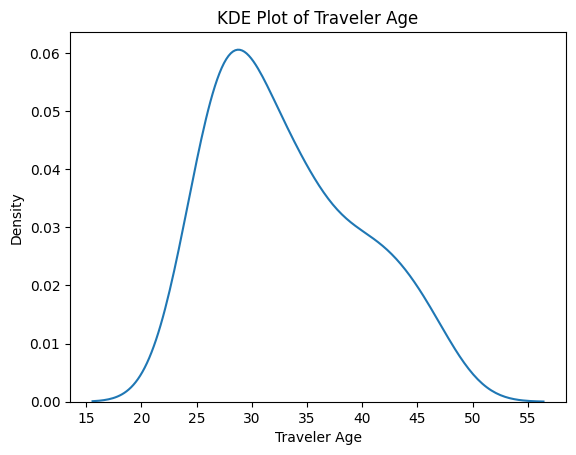

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'traveler_age' is the column you want to visualize
sns.kdeplot(df['traveler_age'])
plt.title('KDE Plot of Traveler Age')
plt.xlabel('Traveler Age')
plt.ylabel('Density')
plt.show()

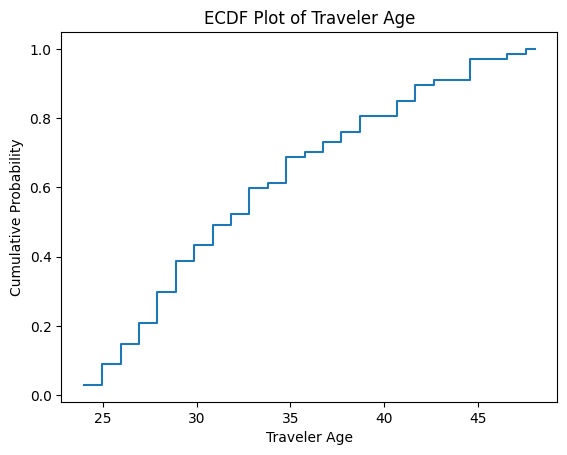

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame and 'traveler_age' is the column you want to visualize
ecdf = sm.distributions.ECDF(df['traveler_age'])

x = np.linspace(min(df['traveler_age']), max(df['traveler_age']))
y = ecdf(x)

plt.step(x, y)
plt.title('ECDF Plot of Traveler Age')
plt.xlabel('Traveler Age')
plt.ylabel('Cumulative Probability')
plt.show()

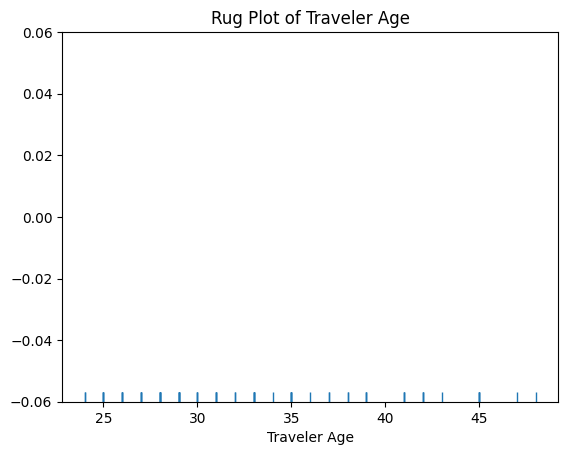

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'traveler_age' is the column you want to visualize
sns.rugplot(df['traveler_age'])
plt.title('Rug Plot of Traveler Age')
plt.xlabel('Traveler Age')
plt.show()

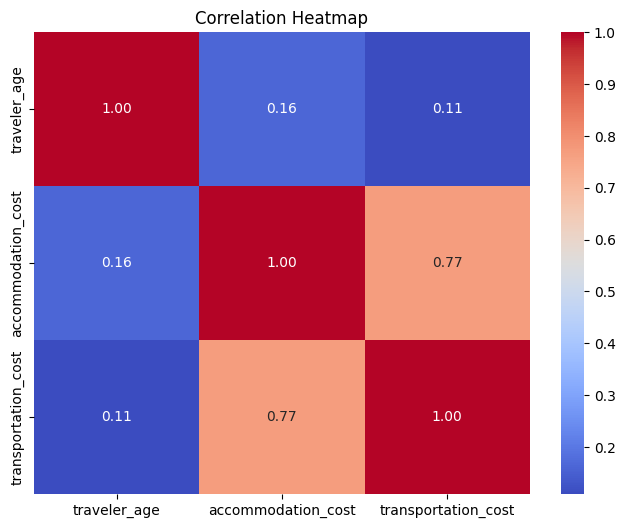

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Select the numerical columns you want to include in the heatmap
numerical_cols = ['traveler_age', 'accommodation_cost', 'transportation_cost']
heatmap_data = df[numerical_cols].corr()  # Calculate the correlation matrix

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

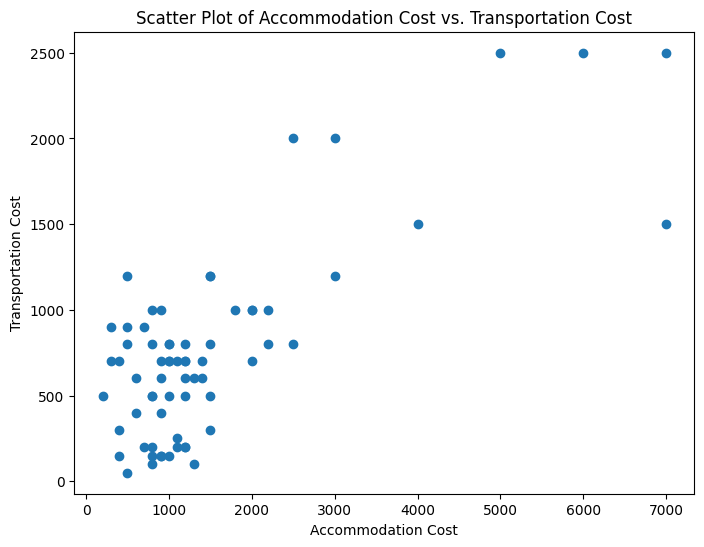

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and you want to plot 'accommodation_cost' against 'transportation_cost'
plt.figure(figsize=(8, 6))  # Set figure size (optional)
plt.scatter(df['accommodation_cost'], df['transportation_cost'])
plt.title('Scatter Plot of Accommodation Cost vs. Transportation Cost')
plt.xlabel('Accommodation Cost')
plt.ylabel('Transportation Cost')
plt.show()

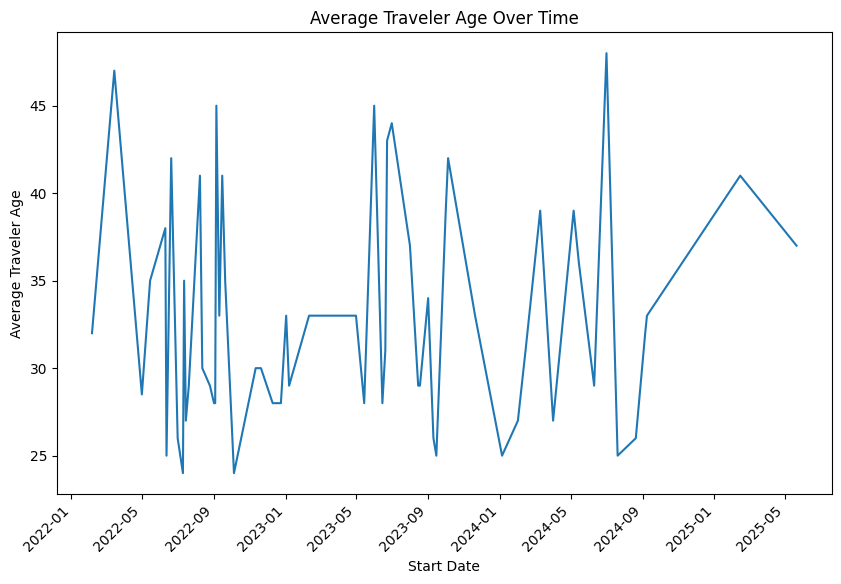

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and you want to plot 'traveler_age' over time ('start_date')
# Make sure 'start_date' is a datetime column
df['start_date'] = pd.to_datetime(df['start_date'])

# Group data by 'start_date' and calculate the average 'traveler_age' for each date
average_age_by_date = df.groupby('start_date')['traveler_age'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_age_by_date.index, average_age_by_date.values)
plt.title('Average Traveler Age Over Time')
plt.xlabel('Start Date')
plt.ylabel('Average Traveler Age')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

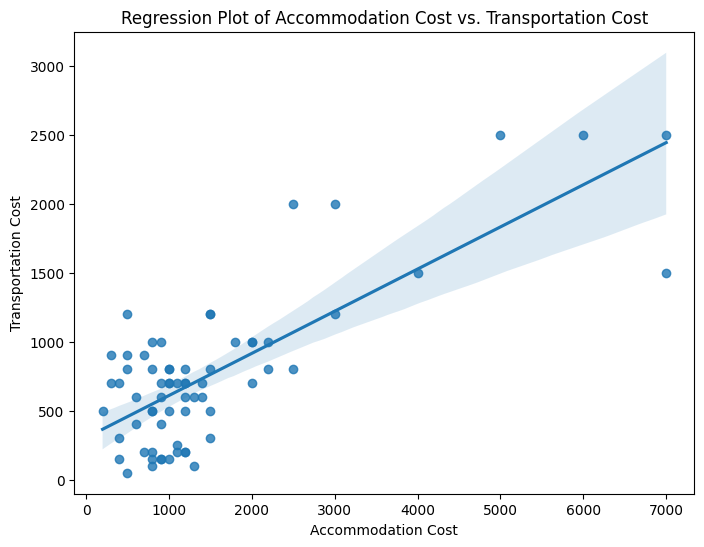

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and you want to plot 'accommodation_cost' against 'transportation_cost'
plt.figure(figsize=(8, 6))  # Set figure size (optional)
sns.regplot(x='accommodation_cost', y='transportation_cost', data=df)
plt.title('Regression Plot of Accommodation Cost vs. Transportation Cost')
plt.xlabel('Accommodation Cost')
plt.ylabel('Transportation Cost')
plt.show()

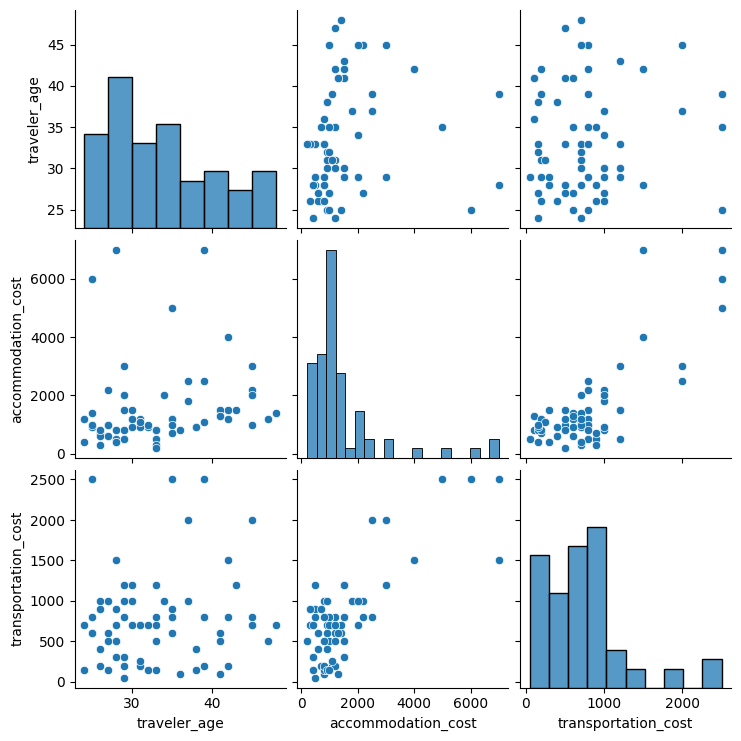

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Select the numerical columns you want to include in the pair plot
numerical_cols = ['traveler_age', 'accommodation_cost', 'transportation_cost']

sns.pairplot(df[numerical_cols])
plt.show()


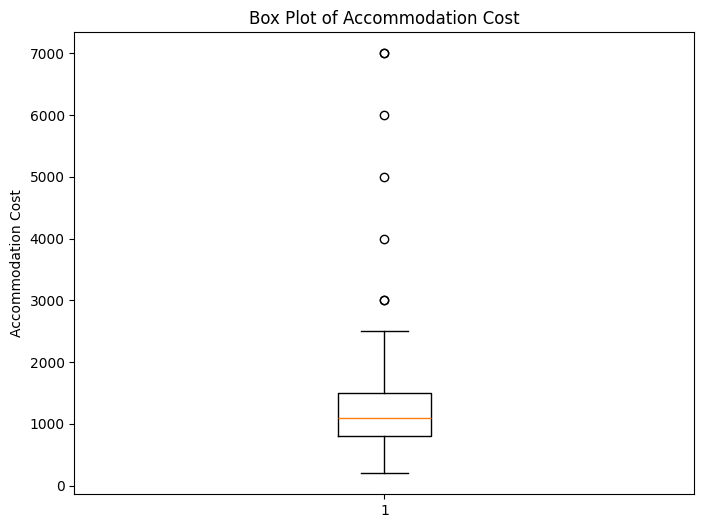

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and you want to create a box plot of 'accommodation_cost'
plt.figure(figsize=(8, 6))  # Set figure size (optional)
plt.boxplot(df['accommodation_cost'])
plt.title('Box Plot of Accommodation Cost')
plt.ylabel('Accommodation Cost')
plt.show()

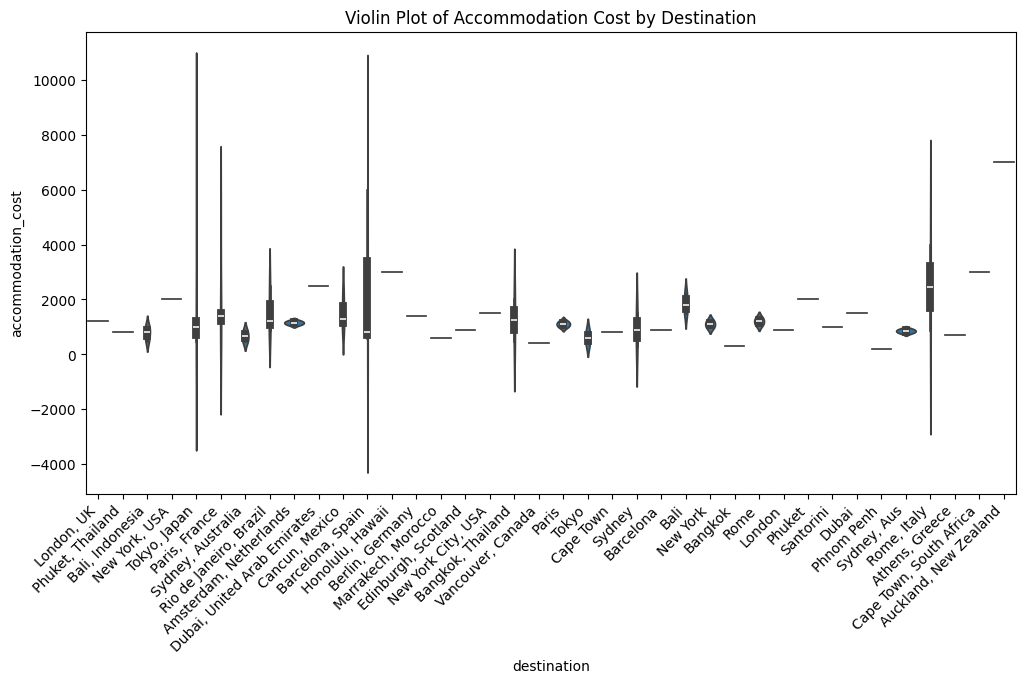

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and you want to create a violin plot of
# 'accommodation_cost' for different 'destination' categories
plt.figure(figsize=(12, 6))  # Set figure size (optional)
sns.violinplot(x='destination', y='accommodation_cost', data=df)
plt.title('Violin Plot of Accommodation Cost by Destination')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

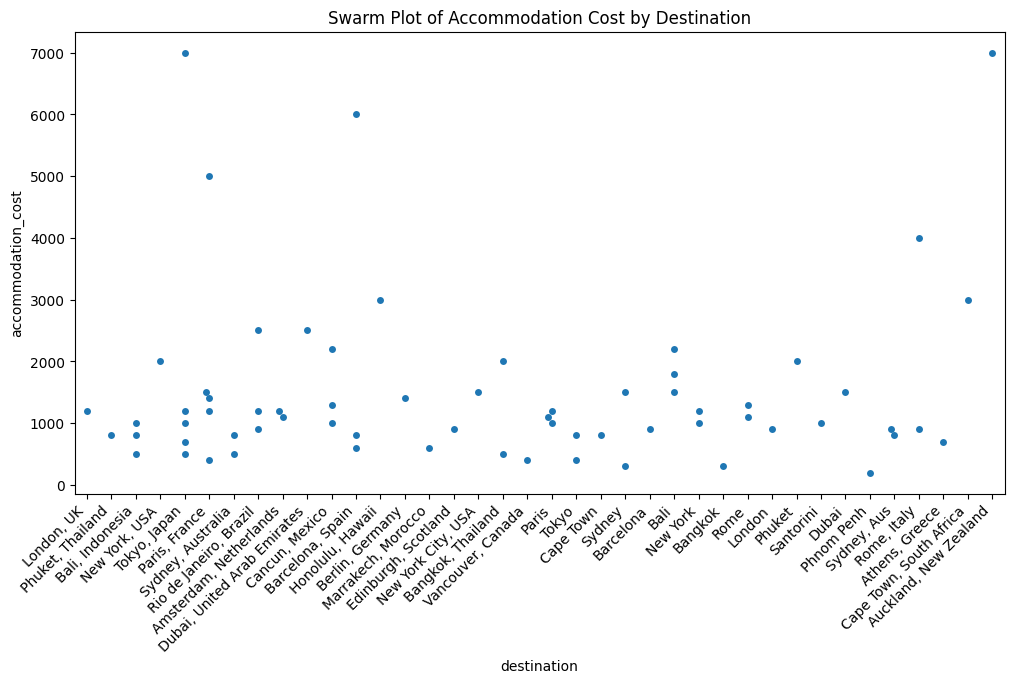

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and you want to create a swarm plot of
# 'accommodation_cost' for different 'destination' categories
plt.figure(figsize=(12, 6))  # Set figure size (optional)
sns.swarmplot(x='destination', y='accommodation_cost', data=df)
plt.title('Swarm Plot of Accommodation Cost by Destination')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()


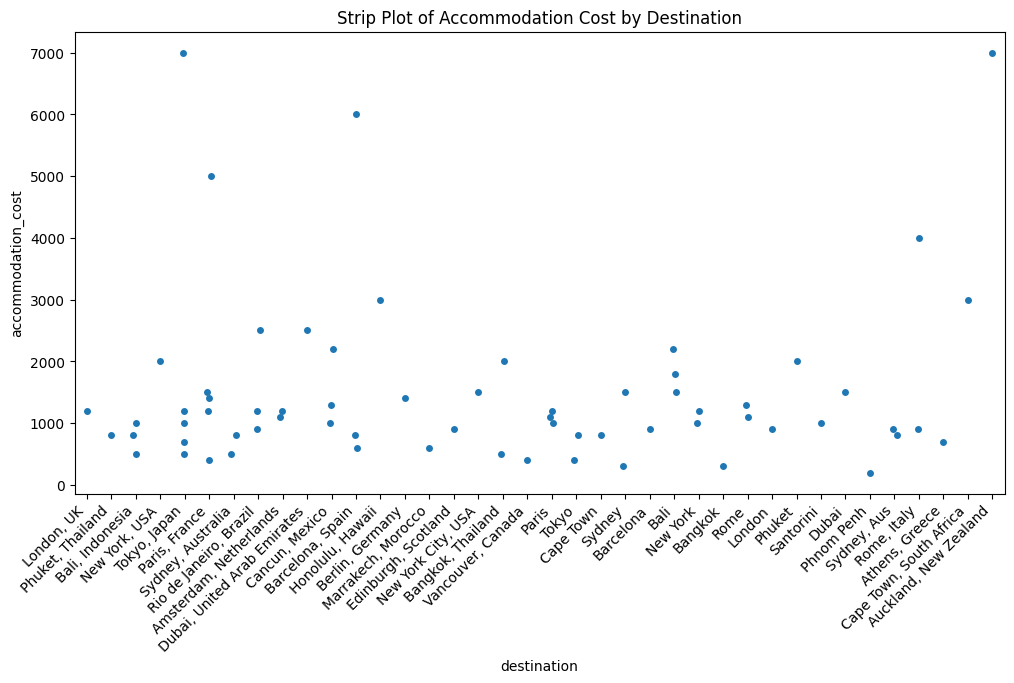

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and you want to create a strip plot of
# 'accommodation_cost' for different 'destination' categories
plt.figure(figsize=(12, 6))  # Set figure size (optional)
sns.stripplot(x='destination', y='accommodation_cost', data=df)
plt.title('Strip Plot of Accommodation Cost by Destination')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

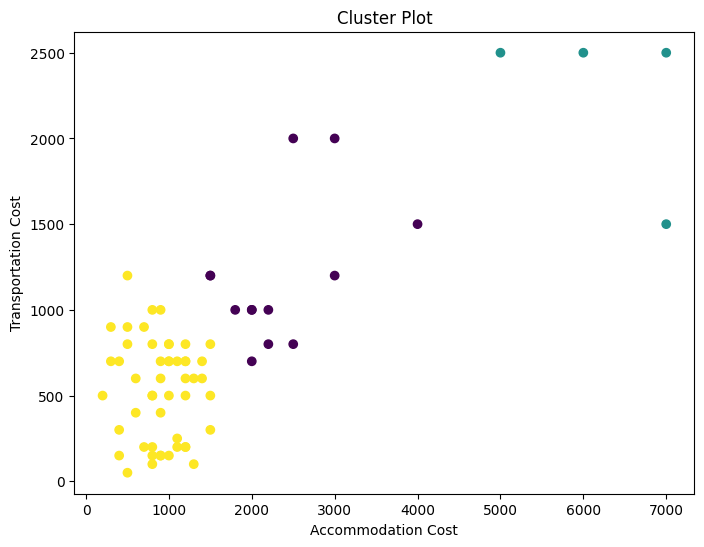

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  # Example clustering algorithm

# Assuming 'df' is your DataFrame with numerical features for clustering
# Select the features for clustering (e.g., 'accommodation_cost', 'transportation_cost')
X = df[['accommodation_cost', 'transportation_cost']]

# Perform clustering (example using KMeans with 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(X)

# Create the cluster plot
plt.figure(figsize=(8, 6))
plt.scatter(df['accommodation_cost'], df['transportation_cost'], c=df['cluster'], cmap='viridis')
plt.title('Cluster Plot')
plt.xlabel('Accommodation Cost')
plt.ylabel('Transportation Cost')
plt.show()


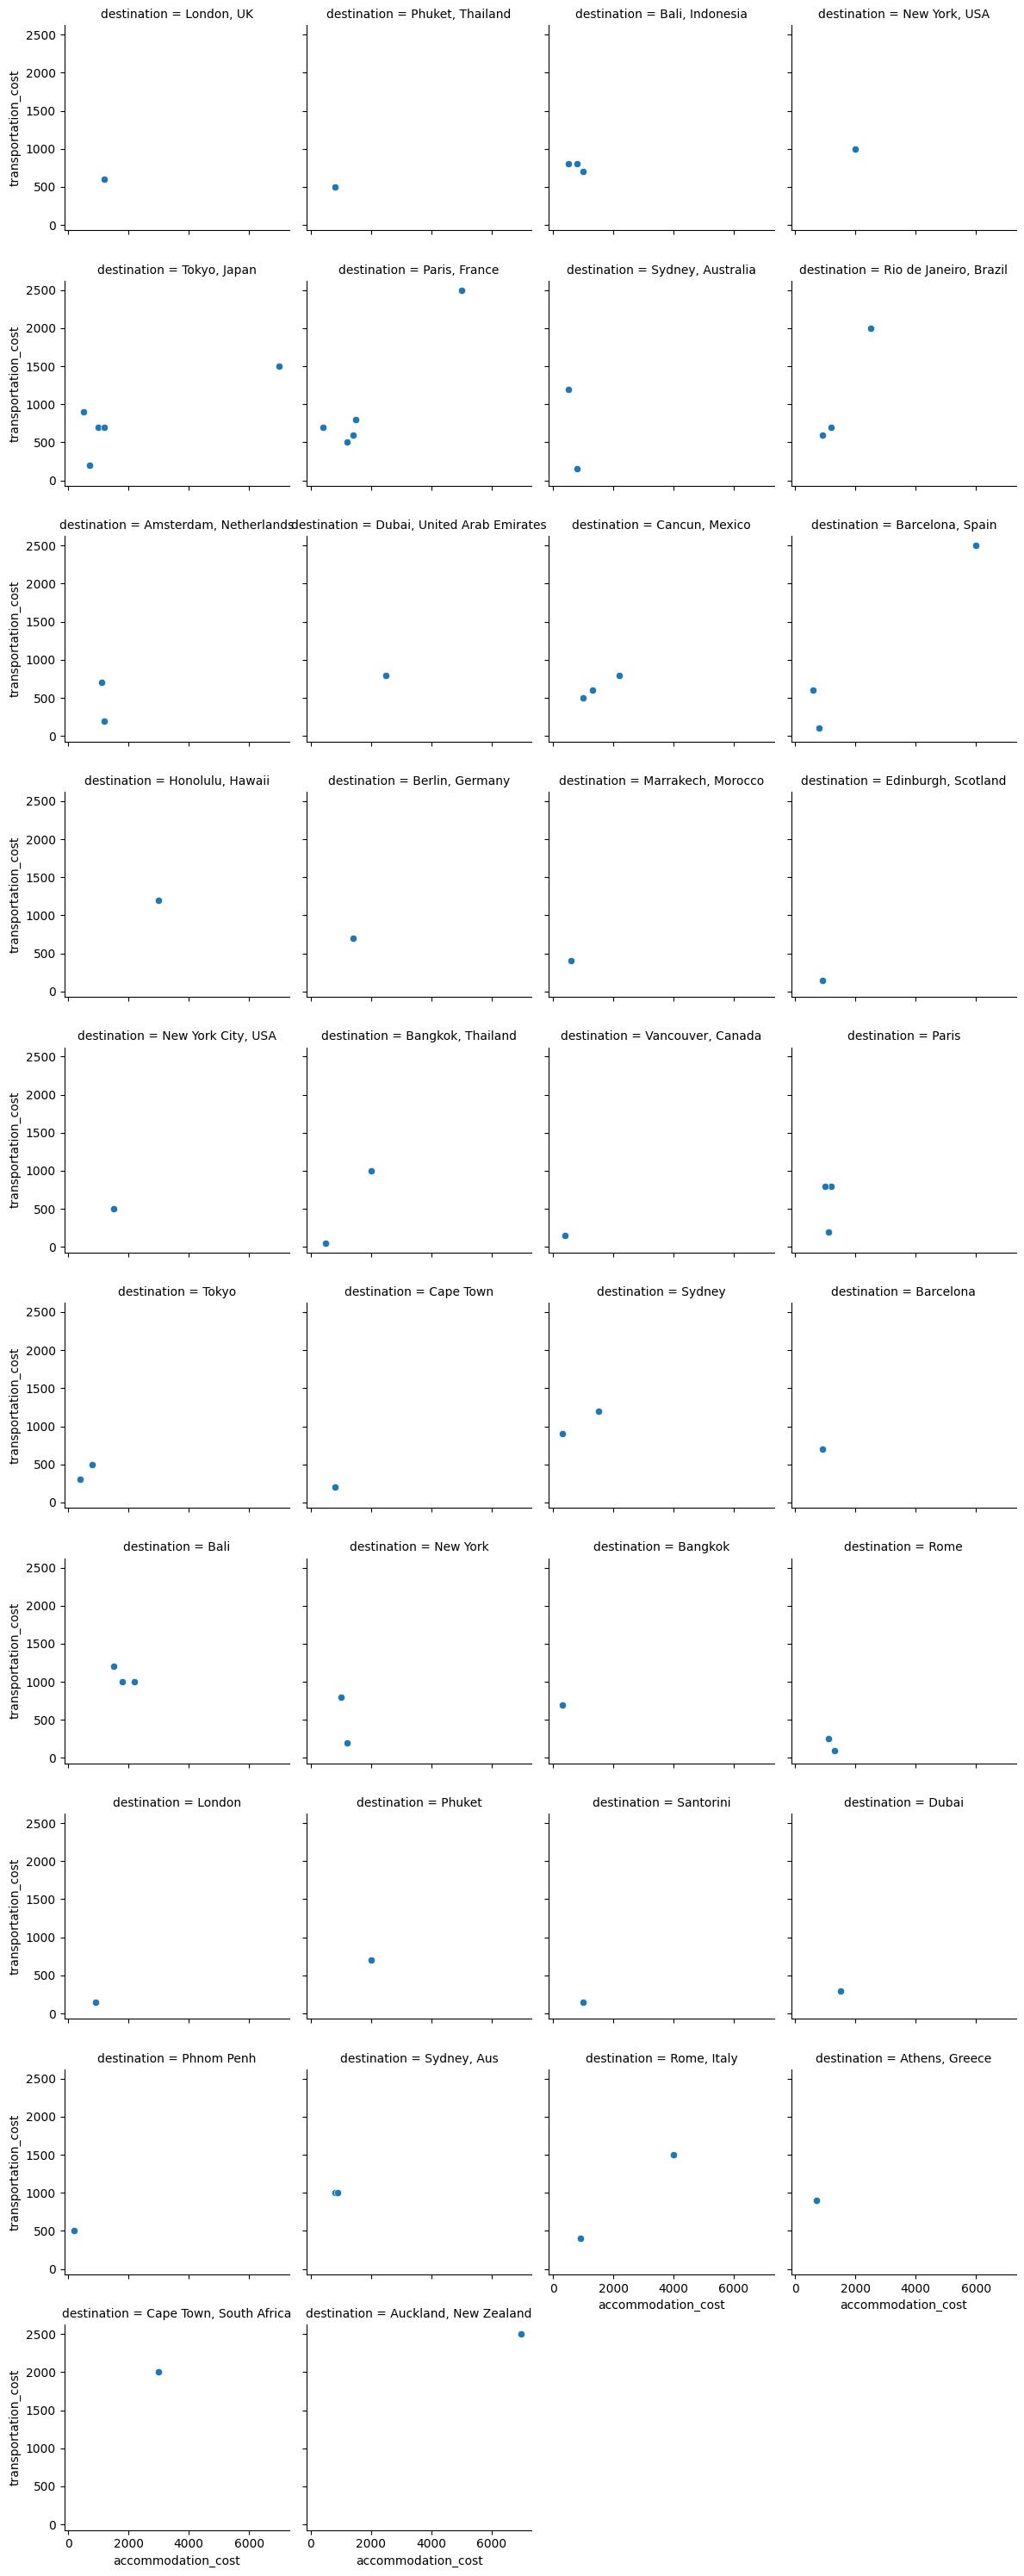

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Create a facet grid with 'destination' as the column variable
g = sns.FacetGrid(df, col='destination', col_wrap=4)  # Adjust col_wrap as needed

# Map a scatter plot to the facet grid, showing 'accommodation_cost' vs. 'transportation_cost'
g.map(sns.scatterplot, 'accommodation_cost', 'transportation_cost')

plt.show()

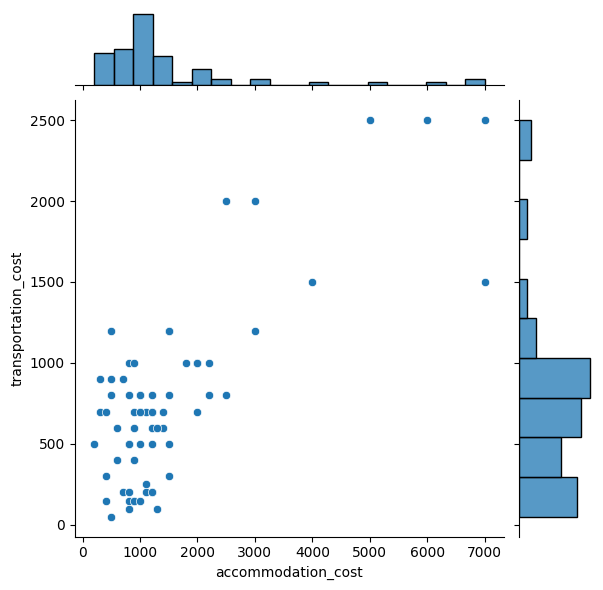

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and you want to create a joint plot of
# 'accommodation_cost' and 'transportation_cost'
sns.jointplot(x='accommodation_cost', y='transportation_cost', data=df)
plt.show()

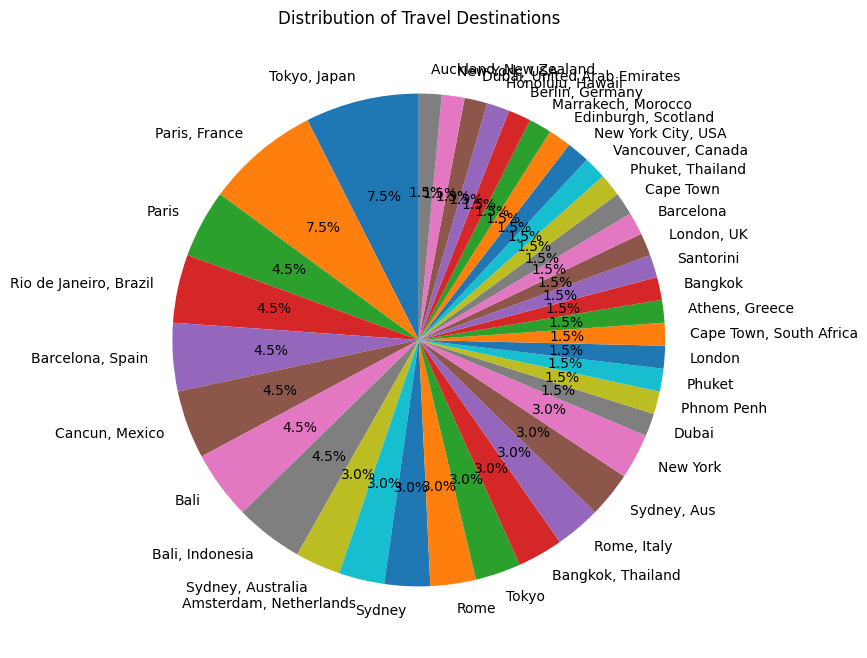

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and you want to create a pie chart of 'destination' frequencies
destination_counts = df['destination'].value_counts()

plt.figure(figsize=(8, 8))  # Set figure size (optional)
plt.pie(destination_counts.values, labels=destination_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Travel Destinations')
plt.show()

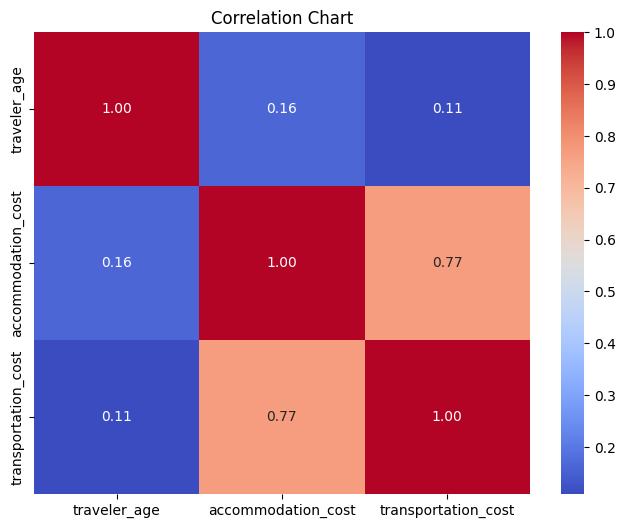

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Select the numerical columns for correlation analysis
numerical_cols = ['traveler_age', 'accommodation_cost', 'transportation_cost']

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Chart')
plt.show()

**Conclusion**
Travel data analysis helps identify trends like popular destinations and customer preferences. Businesses can use these insights to personalize packages, optimize pricing, and enhance customer satisfaction, boosting revenue and loyalty.